#### Notebook setup and imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from dysts.datasets import load_dataset

%matplotlib inline

# Precomputed time series datasets

Load a univariate dataset with train/test splits:

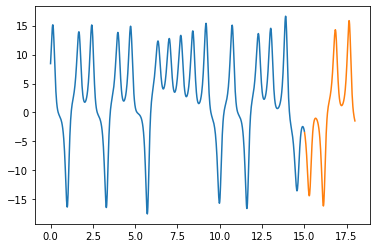

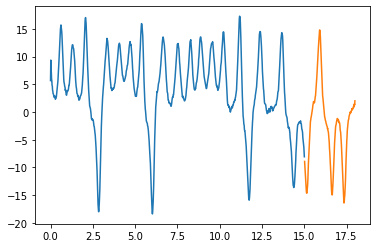

In [6]:
## Load train trajectories
plt.figure()
data = load_dataset(subsets="train", data_format="pandas", standardize=False)
plt.plot(np.array(data.loc["Lorenz"][["time"]]), np.array(data.loc["Lorenz"][["values"]]))

data = load_dataset(subsets="train_val", data_format="pandas", standardize=False)
plt.plot(np.array(data.loc["Lorenz"][["time"]]), np.array(data.loc["Lorenz"][["values"]]))


## Load test trajectories
plt.figure()
data = load_dataset(subsets="test", data_format="pandas", standardize=False)
plt.plot(np.array(data.loc["Lorenz"][["time"]]), np.array(data.loc["Lorenz"][["values"]]))

data = load_dataset(subsets="test_val", data_format="pandas", standardize=False)
plt.plot(np.array(data.loc["Lorenz"][["time"]]), np.array(data.loc["Lorenz"][["values"]]))



## Load trajectories with noise
plt.figure()
data = load_dataset(subsets="test", data_format="pandas", standardize=False, noise=True)
plt.plot(np.array(data.loc["Lorenz"][["time"]]), np.array(data.loc["Lorenz"][["values"]]))

data = load_dataset(subsets="test_val", data_format="pandas", standardize=False, noise=True)
plt.plot(np.array(data.loc["Lorenz"][["time"]]), np.array(data.loc["Lorenz"][["values"]]))


Load all example multivariate time series with train/test split:

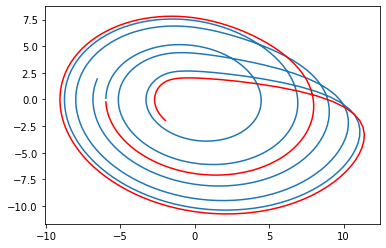

In [3]:
plt.figure()
data = load_dataset(subsets="train", univariate=False, standardize=False)
plt.plot(*data.dataset["Rossler"]["values"].T[:2, -500:])

data = load_dataset(subsets="train_val", univariate=False, standardize=False)
plt.plot(*data.dataset["Rossler"]["values"].T[:2, :500], 'r')


plt.figure()
data = load_dataset(subsets="test", univariate=False, standardize=False)
plt.plot(*data.dataset["Rossler"]["values"].T[:2, -500:])

data = load_dataset(subsets="test_val", univariate=False, standardize=False)
plt.plot(*data.dataset["Rossler"]["values"].T[:2, :500], 'r')

Load all univariate datasets:

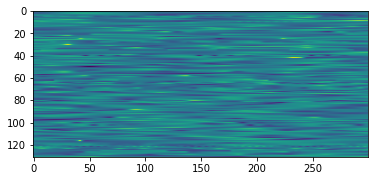

In [4]:
data = load_dataset(data_format="numpy", standardize=True)
plt.imshow(data[:, :300])

Load a precomputed trajectory for a single system

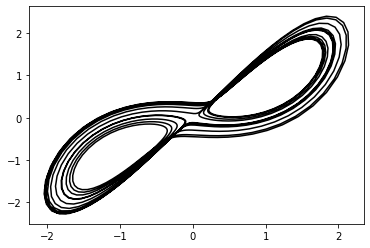

In [5]:
from dysts.flows import *

eq = Lorenz()

tpts, sol = eq.load_trajectory(
    subsets="test", 
    noise=False, 
    granularity="fine", 
    standardize=True, 
    return_times=True
)

plt.plot(sol[:, 0], sol[:, 1], 'k')

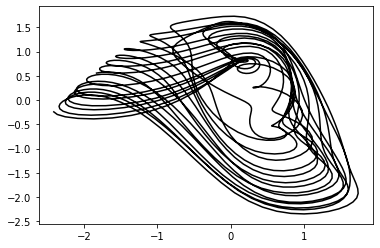

In [6]:
from dysts.flows import *

eq = MackeyGlass()

tpts, sol = eq.load_trajectory(
    subsets="test", 
    noise=False, 
    granularity="fine", 
    standardize=True, 
    return_times=True
)

plt.plot(sol[:, 0], sol[:, 1], 'k')

# Integrate a single dynamical system

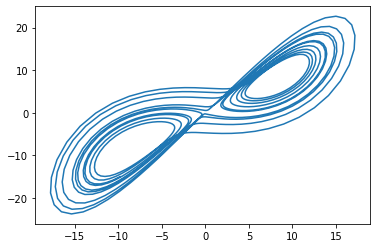

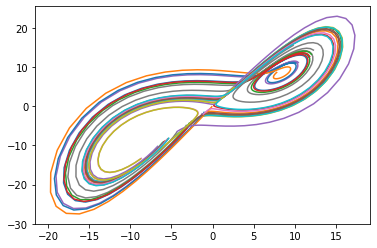

In [3]:
from dysts.flows import *

## Load and simulate an attractor
model = Lorenz()
sol = model.make_trajectory(1000, resample=True)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

## Simulate with noise
sol = model.make_trajectory(1000, resample=True, noise=0.2)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

## Change a parameter value
model.sigma *= 2
sol = model.make_trajectory(1000, resample=True)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

# ## Solve for multiple initial conditions
model = Lorenz()
model.ic = model.ic[None, :] * np.random.random(20)[:, None]
sol = model.make_trajectory(100, resample=True)
plt.figure()
plt.plot(sol[..., 0].T, sol[..., 1].T);

/Users/williamgilpin/program_repos/dysts/dysts/base.py:168: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")


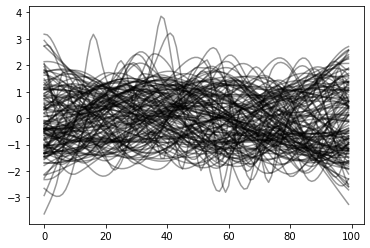

In [5]:
from dysts.base import make_trajectory_ensemble
from dysts.utils import standardize_ts

all_out = make_trajectory_ensemble(100, resample=True)
for attractor_name in all_out:
    plt.plot(standardize_ts(all_out[attractor_name])[:, 0], 'k', alpha=0.4)

Load a precomputed trajectory

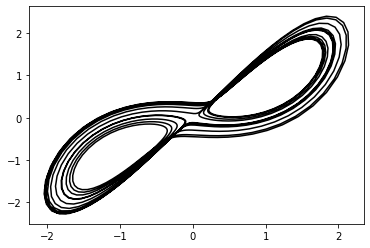

In [5]:
from dysts.flows import *

eq = Lorenz()

tpts, sol = eq.load_trajectory(
    subsets="test", 
    noise=False, 
    granularity="fine", 
    standardize=True, 
    return_times=True
)

plt.plot(sol[:, 0], sol[:, 1], 'k')

# View all attractors

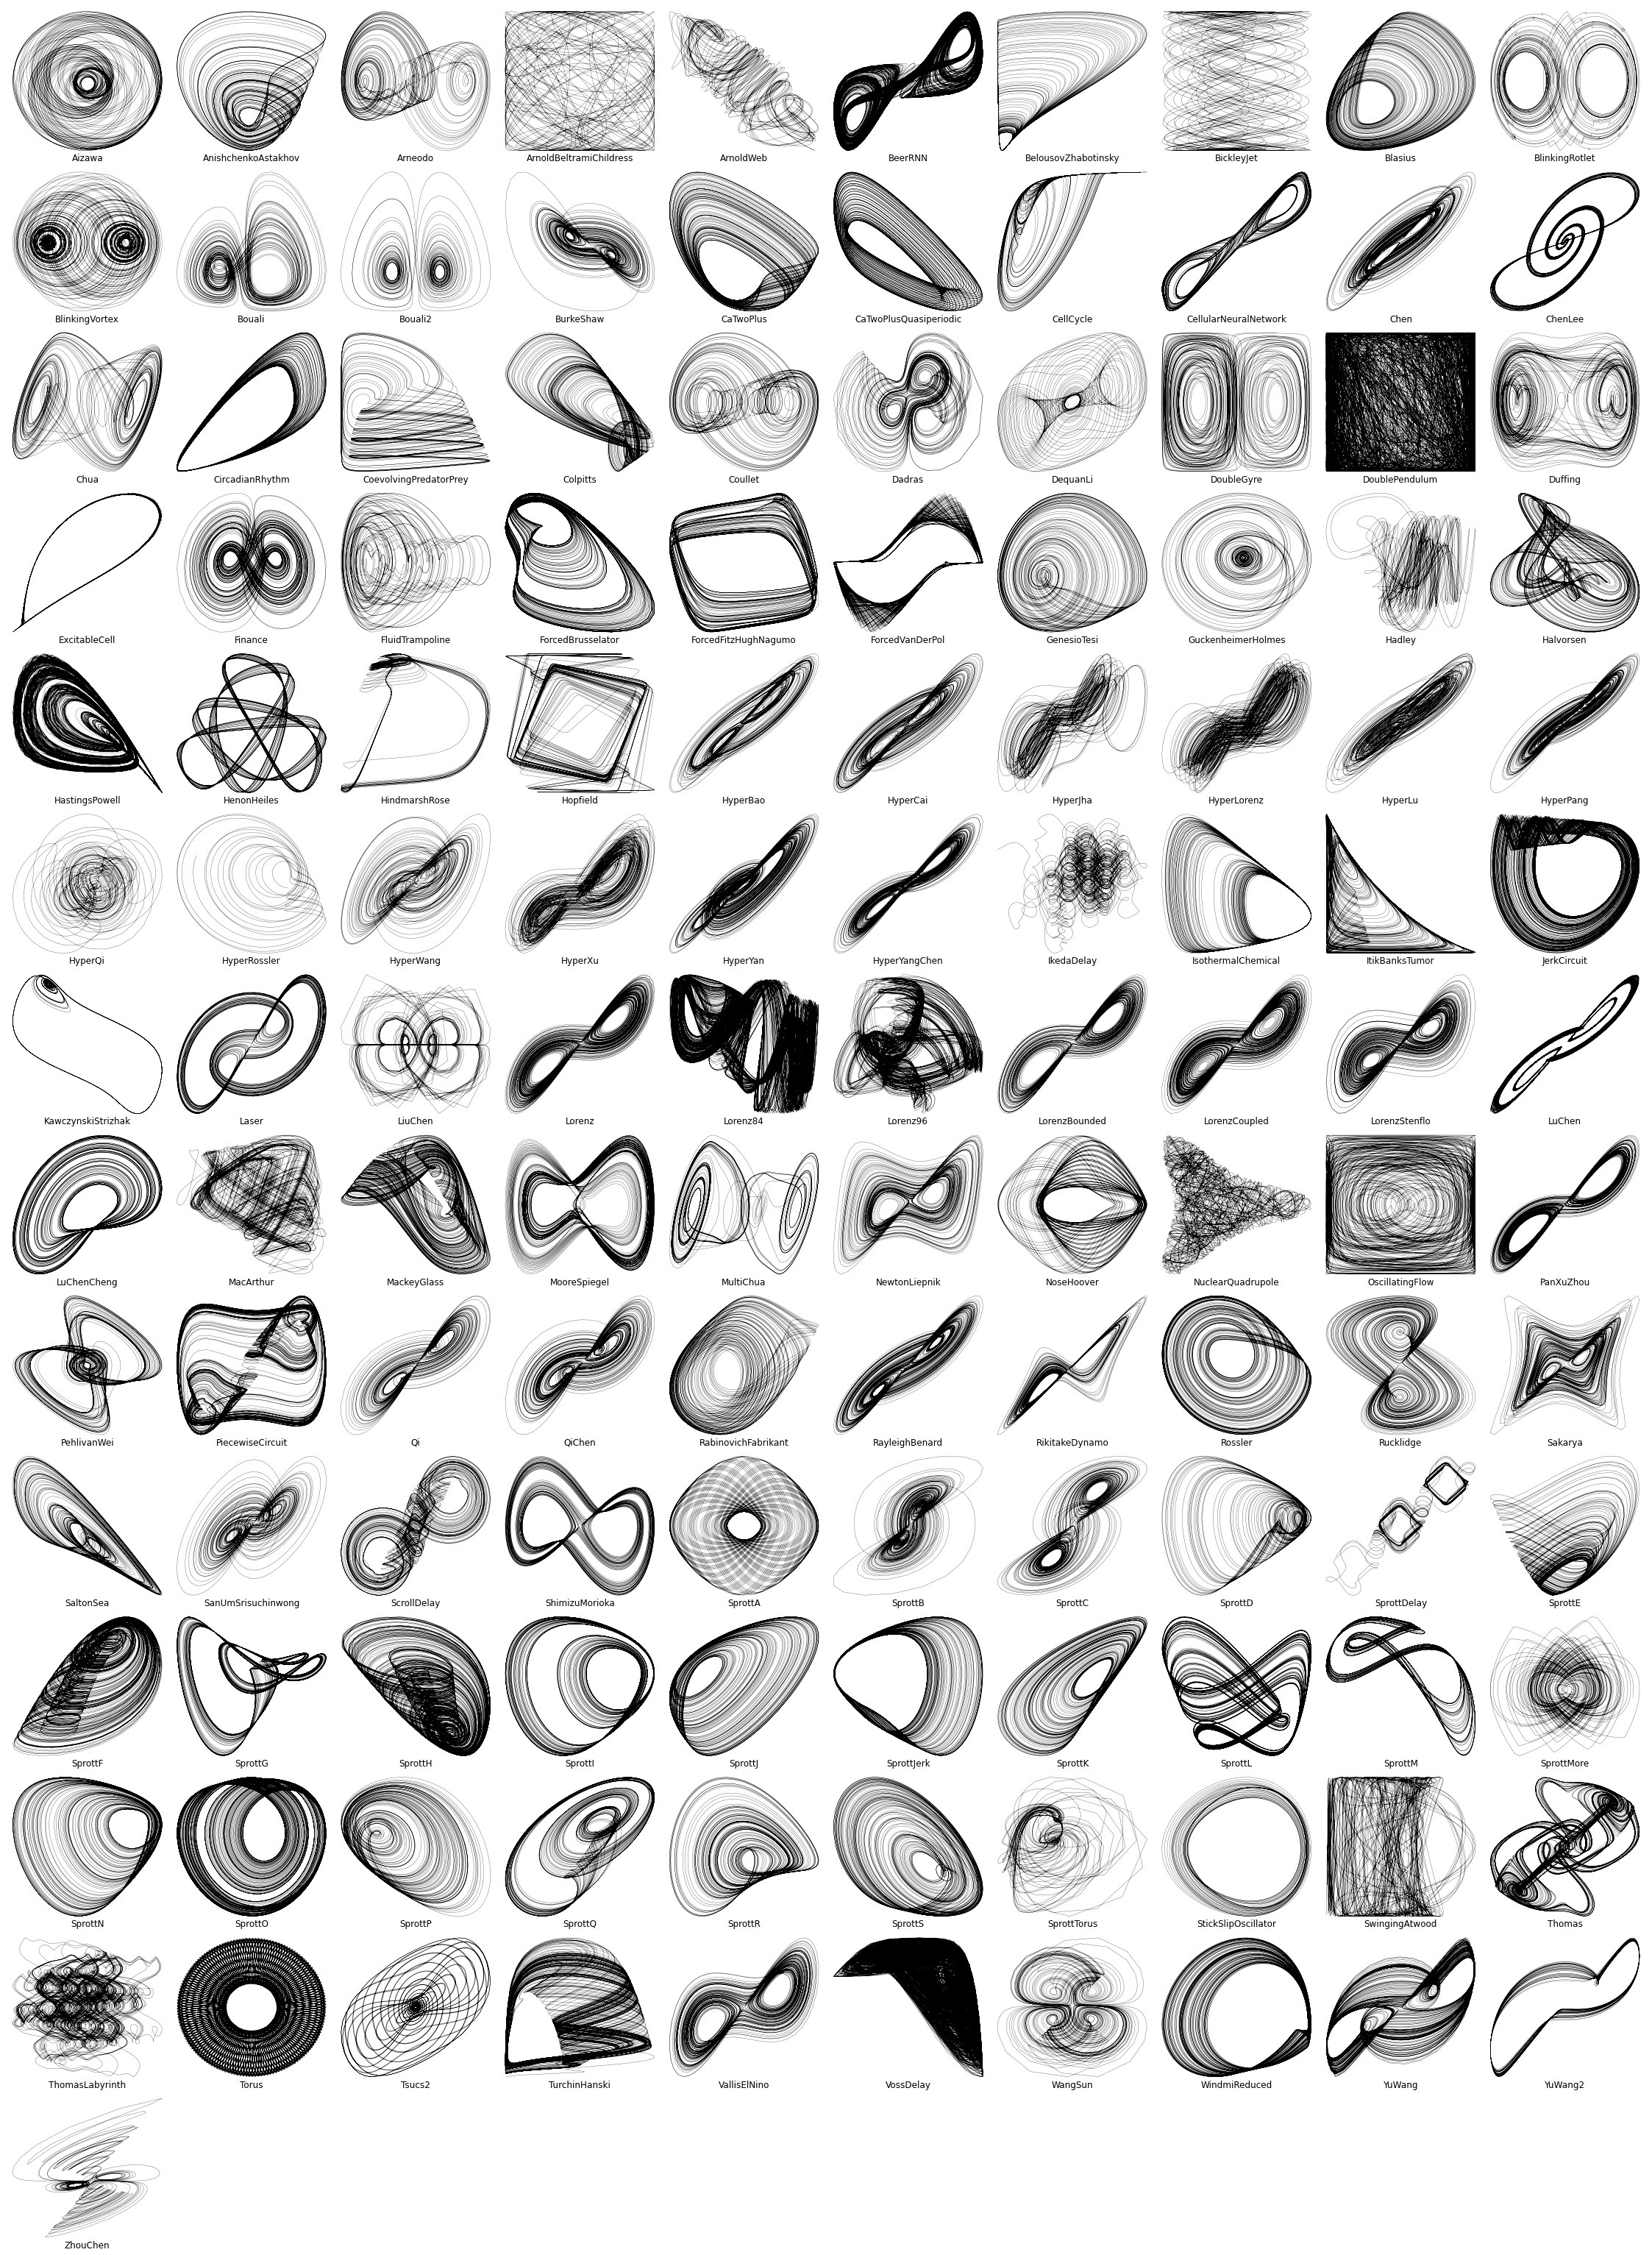

In [71]:
from dysts.base import make_trajectory_ensemble

## Integrate all trajectories
all_trajectories = make_trajectory_ensemble(10000, method="Radau", resample=True)

num_cols = 10
num_rows = int(np.ceil(len(all_trajectories) / num_cols))
fig = plt.figure(figsize=(num_cols*4, num_rows*4))

gs = plt.matplotlib.gridspec.GridSpec(num_rows, num_cols)
gs.update(wspace=0.0, hspace=0.05) 

for i, attractor_name in enumerate(all_trajectories):
    
    sol = all_trajectories[attractor_name]
    
    plt.subplot(gs[i])
    plt.plot(sol[:, 0], sol[:, 1], 'k', linewidth=0.25)
    plt.title(attractor_name, y=-0.05)
    plt.gca().axis('off')

# import degas as dg
# dg.better_savefig("./dysts/data/all_attractors.jpg", dpi=150)
# dg.better_savefig("./dysts/data/all_attractors.png", dpi=150)

# Discrete-time maps

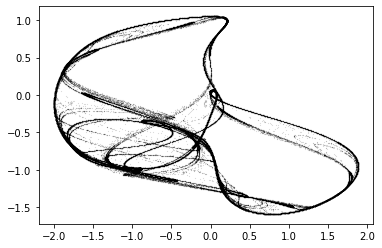

In [7]:
from dysts.maps import DeJong
sol =  DeJong().make_trajectory(100000)
plt.figure()
plt.plot(sol[..., 0], sol[..., 1], '.k', markersize=0.1)

Evolve a group of initial conditions

<Figure size 432x288 with 0 Axes>

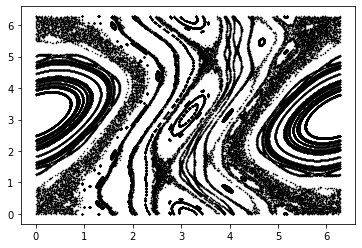

In [8]:
from dysts.maps import Chirikov

## Phase space for Chirikov standard map
model = Chirikov()
model.ic =  2 * np.pi * np.random.random((40, 2)) # uniform random initial conditions
sol = model.make_trajectory(2000)
plt.figure()
plt.figure()
plt.plot(np.mod(sol.T[0], 2*np.pi), np.mod(sol.T[1], 2*np.pi), '.k', markersize=1);